# Titanic Dataset

## Library Imports

In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning and Feature Engineering

In [38]:
df_titanic_raw = pd.read_csv('titanic/train.csv')

In [39]:
df_titanic_raw = df_titanic_raw[(df_titanic_raw['Age'].notna())  & (df_titanic_raw['Fare'].notna()) & (df_titanic_raw['Embarked'].notna())]
df_titanic_raw = df_titanic_raw.drop(['PassengerId', 'Name', 'Ticket'],axis=1)

In [40]:
df_titanic_raw['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
df_titanic_raw['Embarked'].replace(['C', 'Q', 'S'], [0, 1, 2], inplace=True)
df_titanic_raw = df_titanic_raw.reset_index(drop=True)
df_titanic_raw

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,2
1,1,1,0,38.0,1,0,71.2833,C85,0
2,1,3,0,26.0,0,0,7.9250,NaN,2
3,1,1,0,35.0,1,0,53.1000,C123,2
4,0,3,1,35.0,0,0,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,NaN,1
708,0,2,1,27.0,0,0,13.0000,NaN,2
709,1,1,0,19.0,0,0,30.0000,B42,2
710,1,1,1,26.0,0,0,30.0000,C148,0


In [140]:
df_titanic_raw['Deck']=df_titanic_raw['Cabin'].map(lambda x: x[0] if x is not np.nan else 'U')
df_titanic_engineered = df_titanic_raw.drop(['Cabin'], axis=1)
df_titanic_engineered['Family_Size']=df_titanic_raw['SibSp'] + df_titanic_raw['Parch']
df_titanic_engineered['Fare_Per_Person']=df_titanic_engineered['Fare'] / (df_titanic_engineered['Family_Size'] + 1)
df_titanic = df_titanic_engineered
df_titanic


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_Size,Fare_Per_Person
0,0,3,1,22.0,1,0,7.2500,2,U,1,3.625000
1,1,1,0,38.0,1,0,71.2833,0,C,1,35.641650
2,1,3,0,26.0,0,0,7.9250,2,U,0,7.925000
3,1,1,0,35.0,1,0,53.1000,2,C,1,26.550000
4,0,3,1,35.0,0,0,8.0500,2,U,0,8.050000
...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,1,U,5,4.854167
708,0,2,1,27.0,0,0,13.0000,2,U,0,13.000000
709,1,1,0,19.0,0,0,30.0000,2,B,0,30.000000
710,1,1,1,26.0,0,0,30.0000,0,C,0,30.000000


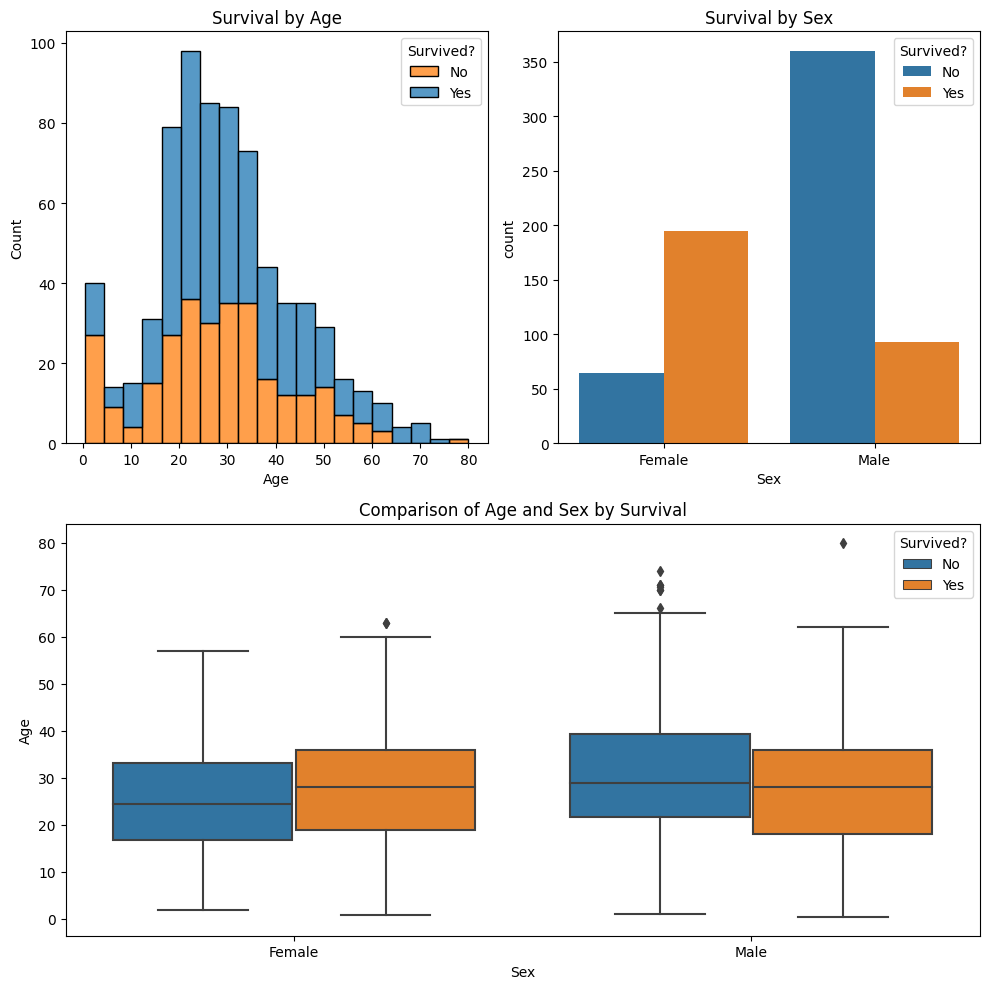

In [128]:
fig = plt.figure(tight_layout=True, figsize=(10, 10))
grid = plt.GridSpec(nrows=2, ncols=2)
ax0 = fig.add_subplot(grid[0, 0])
ax1 = fig.add_subplot(grid[0, 1])
ax2 = fig.add_subplot(grid[1, :])

ax0.set_title('Survival by Age')
sns.histplot(ax=ax0, data=df_titanic, x="Age", hue="Survived", multiple="stack")
ax0.legend(['No', 'Yes'], title='Survived?')

ax1.set_title('Survival by Sex')
sns.countplot(ax=ax1, data=df_titanic, x="Sex", hue="Survived")
x_labels = ['Female', 'Male']
ax1.set_xticklabels(x_labels)
ax1.legend(['No', 'Yes'], title='Survived?')

ax2.set_title('Comparison of Age and Sex by Survival')
sns.boxplot(ax=ax2, data=df_titanic, x="Sex", y="Age", hue="Survived")
x_labels = ['Female', 'Male']
ax2.set_xticklabels(x_labels)
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, labels=['No', 'Yes'], title='Survived?')


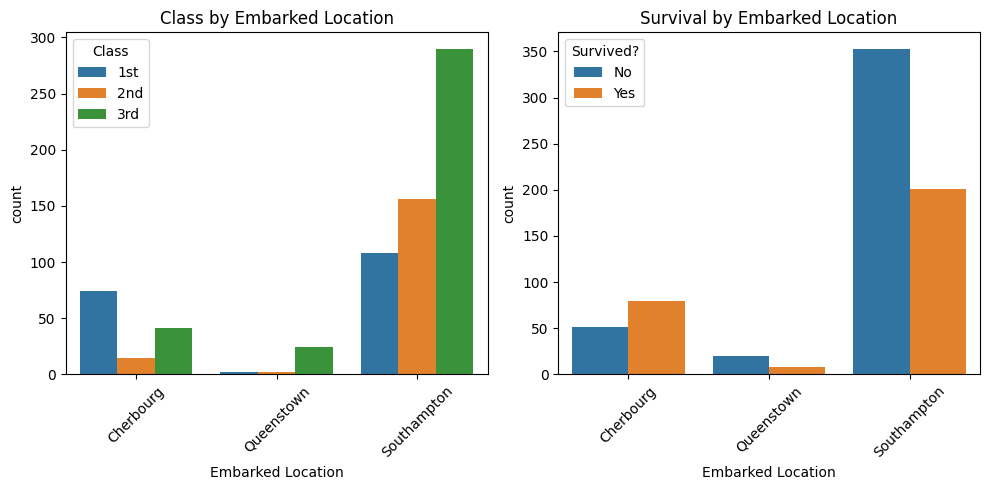

In [141]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(10, 5))

ax0.set_title('Class by Embarked Location')
sns.countplot(ax=ax0, data=df_titanic, x="Embarked", hue="Pclass")
x_labels = ['Cherbourg', 'Queenstown', 'Southampton']
ax0.set_xticklabels(x_labels, rotation=45)
ax0.set_xlabel('Embarked Location')
ax0.legend(['1st', '2nd', '3rd'], title='Class')

ax1.set_title('Survival by Embarked Location')
sns.countplot(ax=ax1, data=df_titanic, x="Embarked", hue="Survived")
x_labels = ['Cherbourg', 'Queenstown', 'Southampton']
ax1.set_xticklabels(x_labels, rotation=45)
ax1.set_xlabel('Embarked Location')
ax1.legend(['No', 'Yes'], title='Survived?')

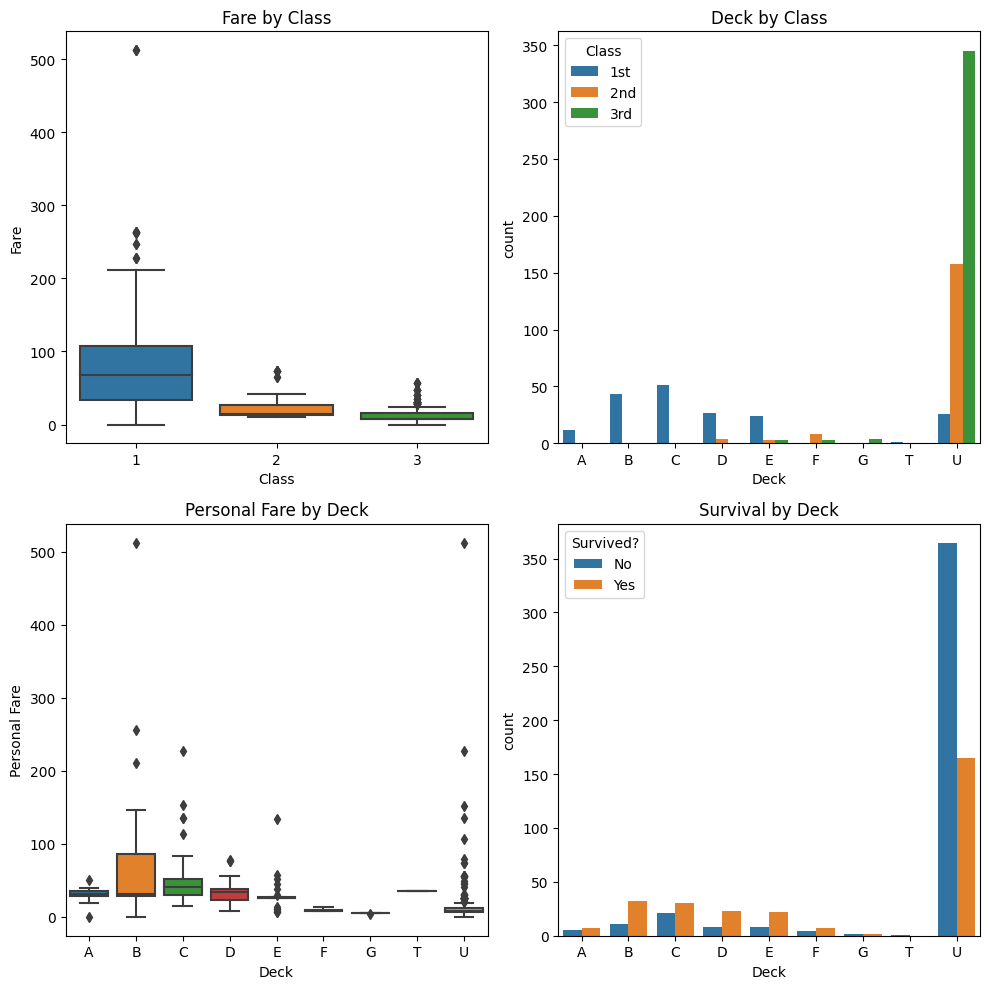

In [145]:
fig = plt.figure(tight_layout=True, figsize=(10, 10))
grid = plt.GridSpec(nrows=2, ncols=2)
ax0 = fig.add_subplot(grid[0, 0])
ax1 = fig.add_subplot(grid[0, 1])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[1, 1])

ax0.set_title('Fare by Class')
sns.boxplot(ax=ax0, data=df_titanic, x="Pclass", y="Fare")
ax0.set_xlabel('Class')
ax0.set_ylabel('Fare')

ax1.set_title('Deck by Class')
sns.countplot(ax=ax1, data=df_titanic, x="Deck", hue="Pclass", order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U'])
ax1.set_xlabel('Deck')
ax1.legend(['1st', '2nd', '3rd'], title='Class')

ax2.set_title('Personal Fare by Deck')
sns.boxplot(ax=ax2, data=df_titanic, x="Deck", y="Fare_Per_Person", order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U'])
ax2.set_xlabel('Deck')
ax2.set_ylabel('Personal Fare')

ax3.set_title('Survival by Deck')
sns.countplot(ax=ax3, data=df_titanic, x="Deck", hue="Survived", order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U'])
ax3.set_xlabel('Deck')
ax3.legend(['No', 'Yes'], title='Survived?')

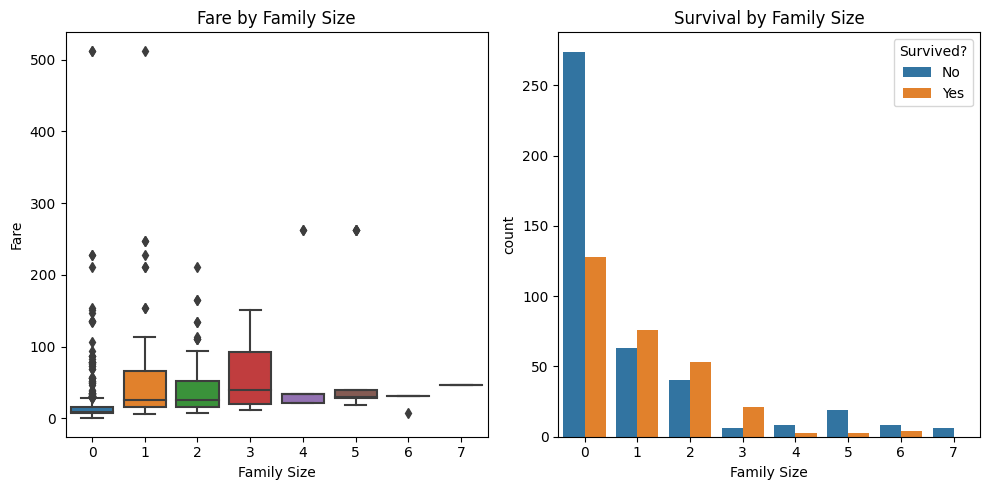

In [139]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(10, 5))

ax0.set_title('Fare by Family Size')
sns.boxplot(ax=ax0, data=df_titanic, x="Family_Size", y="Fare")
ax0.set_xlabel('Family Size')
ax0.set_ylabel('Fare')

ax1.set_title('Survival by Family Size')
sns.countplot(ax=ax1, data=df_titanic, x="Family_Size", hue="Survived")
ax1.set_xlabel('Family Size')
ax1.legend(['No', 'Yes'], title='Survived?')

ax2.set_title('Survival by Class')
sns.countplot(ax=ax2, data=df_titanic, x="Pclass", hue="Survived")
ax2.set_xlabel('Class')
ax2.legend(['No', 'Yes'], title='Survived?')


## Dataset Splitting

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df_titanic.drop('Survived',axis=1), df_titanic.Survived)
df_titanic_raw = pd.read_csv('titanic/test.csv')

## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
predict = model.predict(X_test)

In [ ]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['predicted no','Predicted yes'], index=['Actual no', 'Actual yes'])

,predicted no,Predicted yes
Actual no,91,18
Actual yes,14,55


In [ ]:
model.score(X_test, y_test)

0.8202247191011236

In [ ]:
prediction = model.predict(X_test)
np.sum(prediction == y_test )/ len(y_test)

0.8202247191011236